# Notebook para el análisis y visualización de datos
- Alvarado Morán Óscar

In [1]:
# Se importan las bibliotecas necesarias, sólo se utilizan de visualización en este caso
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Importando datasets

## Tabla de tipos:
Se importan los datos creados en el documendo `Creando_datasets.ipynb` de la tabla de tipos.
Los reenglones representan los tipos del pokemon que recibe el ataque. Las columnas representan el tipo del ataque ejecutado. 

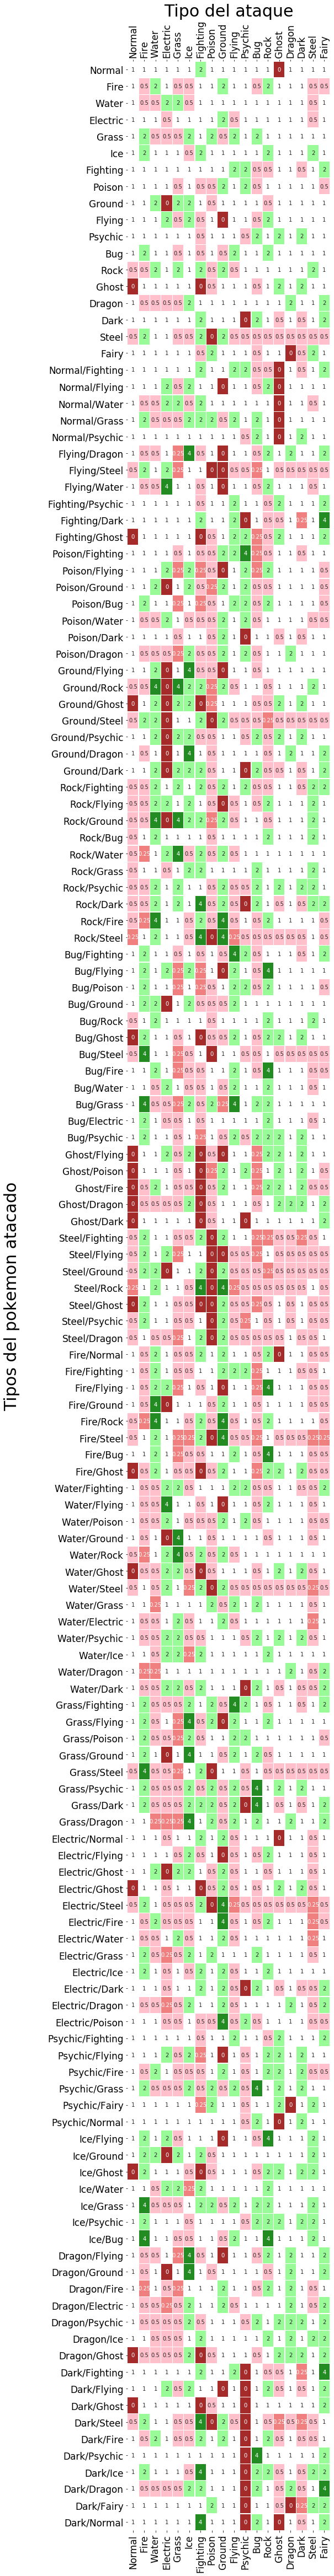

In [10]:
# Leyendo datos
df_tipos = pd.read_csv('../datos/Type_chart.csv')
# Configurando los índices para un buen manejo del dataframe
df_tipos.set_index(['type1', 'type2'], inplace = True)
# Obtenemos un array para hacer el heatmap necesario
array = np.asarray(df_tipos).astype(float)
# Utilizamos un heatmap personalizado para que cada valor tuviera los colores deseados. Es más intenso el rojo 
heatmap = ['brown', 'lightcoral', 'pink', 'white', 'white', 'white', 'white', 
           'white', 'palegreen', 'palegreen', 'palegreen', 'palegreen','palegreen', 
           'palegreen', 'palegreen', 'palegreen', 'forestgreen']
# Se crea el lienzo sobre el que se dibujará en heatmap          
fig, ax = plt.subplots(figsize = (8.5, 65))

# Utilizamos seaborn para más facilidad en el manejo del heatmap
p = sns.heatmap(array, cmap = heatmap, linewidths = 0.3, ax = ax, annot = True, cbar = False)
# Títulos de los ejes
a = [indice[0] for indice in df_tipos.index[:18]]
b = [indice[0]+'/'+indice[1] for indice in df_tipos.index[18:]]
# Dibujamos lo que significa cada eje
ax.set_yticklabels(a+b, rotation = 'horizontal', fontsize = 17)
ax.set_xticklabels(a, rotation = 'vertical', fontsize = 17)
# Dibujamos lo que va en el eje x arriba y abajo para que sepueda visualizar bien
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
# Ponemos un título
ax.set_title('Tipo del ataque', fontsize = 30)
# Ponemos una legenda al eje y
ax.set_ylabel('Tipos del pokemon atacado', fontsize = 30, labelpad = 50)
# Guardamos la Figura
#plt.savefig('../visualizacion/Type_chart.png')
plt.show()

## Estadísticas de cada pokemon.
Cada renglón representa un pokemon y cada columna un atributo de éste. 

In [3]:
# Leemos los datos creaodos en el archivo ''Creando_datasets''
df_pokemon = pd.read_csv('../datos/pokemon_completo_ordenado.csv')
# Como índice fijamos al númro en el pokedx de cada pokémon
df_pokemon.set_index('pokedex_number', inplace = True)
# Visualizamos sólo los primeros cinco reenglones
df_pokemon.head()

,name,type1,type2,abilities,classification,capture_rate,experience_growth,percentage_male,height_m,weight_kg,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,grass,poison,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,1059860,88.1,0.7,6.9,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,Ivysaur,grass,poison,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,1059860,88.1,1.0,13.0,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,Venusaur,grass,poison,"['Overgrow', 'Chlorophyll']",Seed Pokémon,45,1059860,88.1,2.0,100.0,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
4,Charmander,fire,NaN,"['Blaze', 'Solar Power']",Lizard Pokémon,45,1059860,88.1,0.6,8.5,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
5,Charmeleon,fire,NaN,"['Blaze', 'Solar Power']",Flame Pokémon,45,1059860,88.1,1.1,19.0,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


Vemos los datos faltantes en el dataset

In [4]:
# Buscamos dónde hay nulos y obtenemos los resultados por columna
faltantes = df_pokemon.isna().sum()
# Obtenemos aquellas columnas en donde sí hay nulos
faltantes = faltantes[faltantes != 0]
# Agregamos una columa en cero al dataframe de pandas creado arriba
faltantes['Otros'] = 0
# Visualizamos valores
faltantes

type2              435
percentage_male    116
height_m            20
weight_kg           20
base_happiness      81
Otros                0
dtype: int64

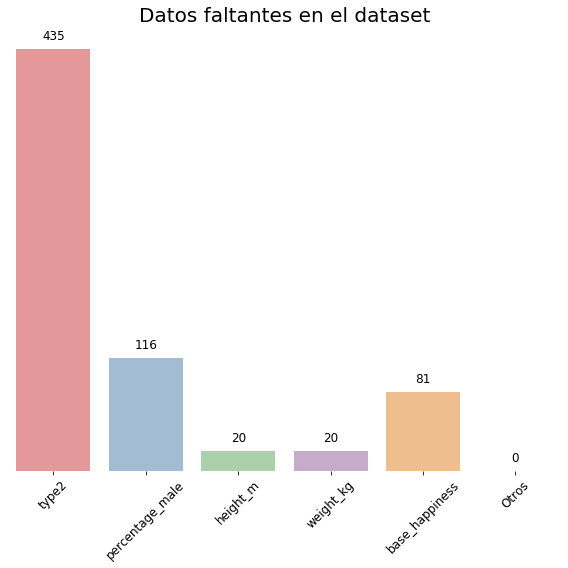

In [7]:
# Con esto graficaremos lso datos obtenidos arriba
# Dibujamos el lienzo donde pondremos las gráficas que vayamos creando
fig, ax = plt.subplots(figsize = (8,8))
# Definimos una paleta de colores a utilizar para la graficación
colors1 = sns.color_palette('Set1')
# Creamos la gráfica de barras con los valores de la variable 'faltantes'
graf = sns.barplot(ax = ax, x = list(faltantes.axes[0]), y = list(faltantes.values), alpha = 0.5, 
                   palette = colors1)
# Escribimos los valores de cada elemento de la 'serie' de pandas sobre cada barra
for idx, valor in enumerate(faltantes.iteritems()):
    graf.text(idx, valor[1] + 10, valor[1], color='black', ha="center", fontsize = 12)
#Arreglamos el gráfico quitándole cosas innecesarias y acomodando lo necesario.   
ax.set_xticklabels(list(faltantes.axes[0]), rotation = 45, fontsize = 12)
ax.set_yticks([int(i) for i in list(np.linspace(0,450,6))])
ax.set_title('Datos faltantes en el dataset', fontsize = 20)
sns.despine(bottom = True, left = True)
ax.set_yticks([])
plt.savefig("../visualizacion/faltantes.png")

Se observa que hay varios datos faltantes. Para los valores de 'type2', 'heihgt_m' y 'weight_kg' se tienen estas inconsistencias debido al dataset del cuál se obtuvo la información, además de que probablemente al actualizar ese dataset muchos pokemon no tenían segundo tipo y fueron adquiriéndolo con el tiempo. Los valores faltantes de 'base_happiness' se deben a que para la octava generación no están disponibles estos datos. Por último, las columnas de 'type2' y 'percentage_male' tienen tantos faltantes porque algunos pokemon son de un solo tipo, por lo que su tipo 2 se marca como nulo, además, ciertos pokemon, como los legendarios no presentan un sexo, por lo que no se tiene un porcentaje de encuentro por sexo.

Ahora veamos las cuentas por tipo.

In [14]:
def donut_chart(tamaños):
    """
    Función que crea unan gráfica de 'dona partida' que muestra las cuentas que hay del tipo 1 y del tipo 2 para los tipos 
    de pokemon existentes.
    
    Parámetros
    -----
    tamaños: lista de enteros
        Lista con los tamaños que se quieren poner en la gráfica de 'dona partida'.
    """
    # Iniciamos la figura y los ejes sobre los que pondremos nuestra gráfica.
    fig, ax = plt.subplots(figsize = (10,10), subplot_kw=dict(aspect="equal"))
    # La distancia que se aleja cada rebanada de la posición original
    explodes = [0.1 for _ in range(len(tamaños))]
    # Diccionario con las propiedades que queremos que tengam las rebanadas de la dona.
    dicwedge = {'alpha': 0.7}
    # Los colores oficiales del sitio de pokemon.com apra cada tipo
    colores = {'water': '#4592c4', 'normal': '#a4acaf', 'grass': '#9bcc50', 'bug': '#729f3f',
               'fire': '#fd7d24', 'psychic': '#f366b9', 'rock': '#a38c21', 'electric': '#eed535', 
               'ground': '#d79877', 'dark': '#707070', 'poison': '#b97fc9', 'fighting': '#d56723', 
               'dragon': '#a2535f', 'ghost': '#7b62a3', 'steel': '#9eb7b8', 'ice': '#51c4e7', 
               'fairy': '#fdb9e9', 'flying': '#8ca8d7'}
    # Obtenemos una lista con nombres de los colores del diccionario creado arriba
    color_names = list(colores.keys())
    # Obtenemos una lista con los colores del diccionario creado arriba
    list_colores = list(colores.values())
    # Dibujamos una gráfica de pastel con las observaciones mencionadas arriba (todavía no es una dona)
    wedges, text = ax.pie(tamaños,pctdistance = 0.85, explode = explodes, 
                        colors = list_colores, wedgeprops = dicwedge, radius = 0.9)

    # Le pondremos lo que quiere decir cada rebanada en unas cajas fuera de la dona
    # Propiedades de la caja
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    # Propiedades de las líneas que conectan la dona con la caja
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")
    # Para cada rebanada hacemos una caja
    for i, p in enumerate(wedges):
        # Le decimos su posición
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        # Estilo de la conexión entre las rebanadas y las cajas, utilizamos el diccionario creado arriba
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle, "color": 'k'})
        # Definimos qué tan alejadas estarán las cajas del centro de la dona
        radio = 1.2
        # Escribimos dentro de la caja
        ax.annotate(color_names[i]+': '+str(tamaños[i]), xy=(x, y), xytext=(radio*x, radio*y),
                    horizontalalignment = horizontalalignment, **kw, alpha = 0.5)
    # Dibujamos un círculo blanco en el centro de la gráfica de pastel para que parezca una dona
    centre_circle = plt.Circle((0,0),0.75, fc = 'white') # Creamos un círculo centrado en (0,0) y radio 0.7
    fig = plt.gcf() # Get the Current Figure
    fig.gca().add_artist(centre_circle) # Get the Current Axis y agrega el círculo.
    # Ponemos un título
    ax.set_title('Pokemon por primer tipo', fontsize = 20)
    # Guardamos
    fig.savefig('../visualizacion/Tipo1.png')
    plt.show()

- Tipo 1

In [15]:
# Nos fijamos en el primer tipo
tipo1 = df_pokemon.type1
tipo1.value_counts()
tamaños1 = [valor for valor in tipo1.value_counts().values]

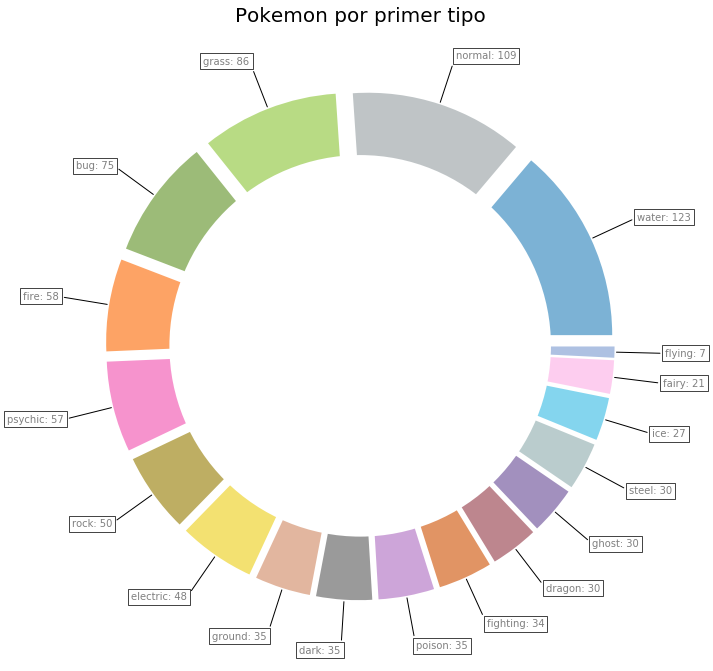

In [16]:
donut_chart(tamaños1)

- Tipo 2

In [202]:
# Nos fijamos en el segundo tipo
tipo2 = df_pokemon.type2
tipo2.value_counts()
tamaños2 = [valor for valor in tipo2.value_counts().values]

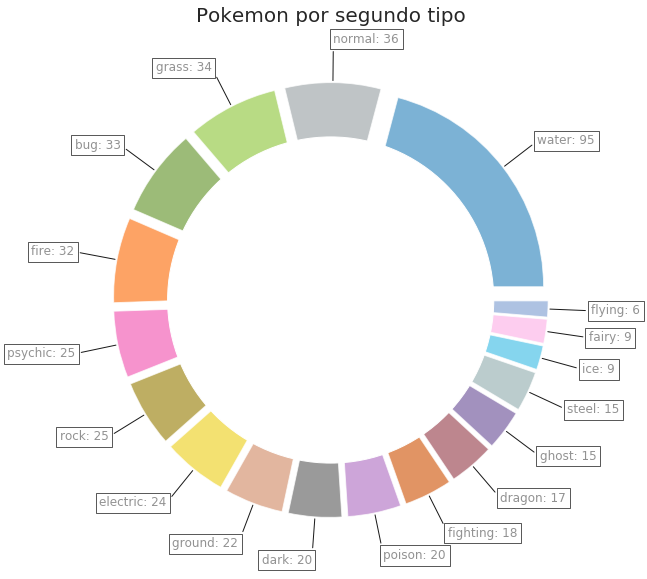

In [203]:
donut_chart(tamaños2)